# Dados Pacientes Cardíacos

O Dataset se encontra em inglês


Attribute Information:

Only 14 attributes used:
1. (age) age: age in years 
2. (sex) sex (1 = male; 0 = female)
3. (cp) chest pain type




        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic

4. (trestbps) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) chol: serum cholestoral in mg/dl
6. (fbs) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) restecg: resting electrocardiographic results
8. (thalach) thalach: maximum heart rate achieved
9. (exang) exang: exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) oldpeak = ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
         * Value 1: upsloping
         * Value 2: flat
         * Value 3: downsloping
12. (ca) ca: number of major vessels (0-3) colored by flourosopy
13. (thal) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute)  num: diagnosis of heart disease (angiographic disease status)
         * Value 0: < 50% diameter narrowing
         * Value 1: > 50% diameter narrowing

(in any major vessel: attributes 59 through 68 are vessels)

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline




dataset = pd.read_csv("/content/drive/MyDrive/heart.csv",sep=",")
#dataset.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Intervalo de Idade da Amostra**

Idade Variando entre 29 anos e 77 anos

In [ ]:
dataset["age"].value_counts().sort_index()

29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

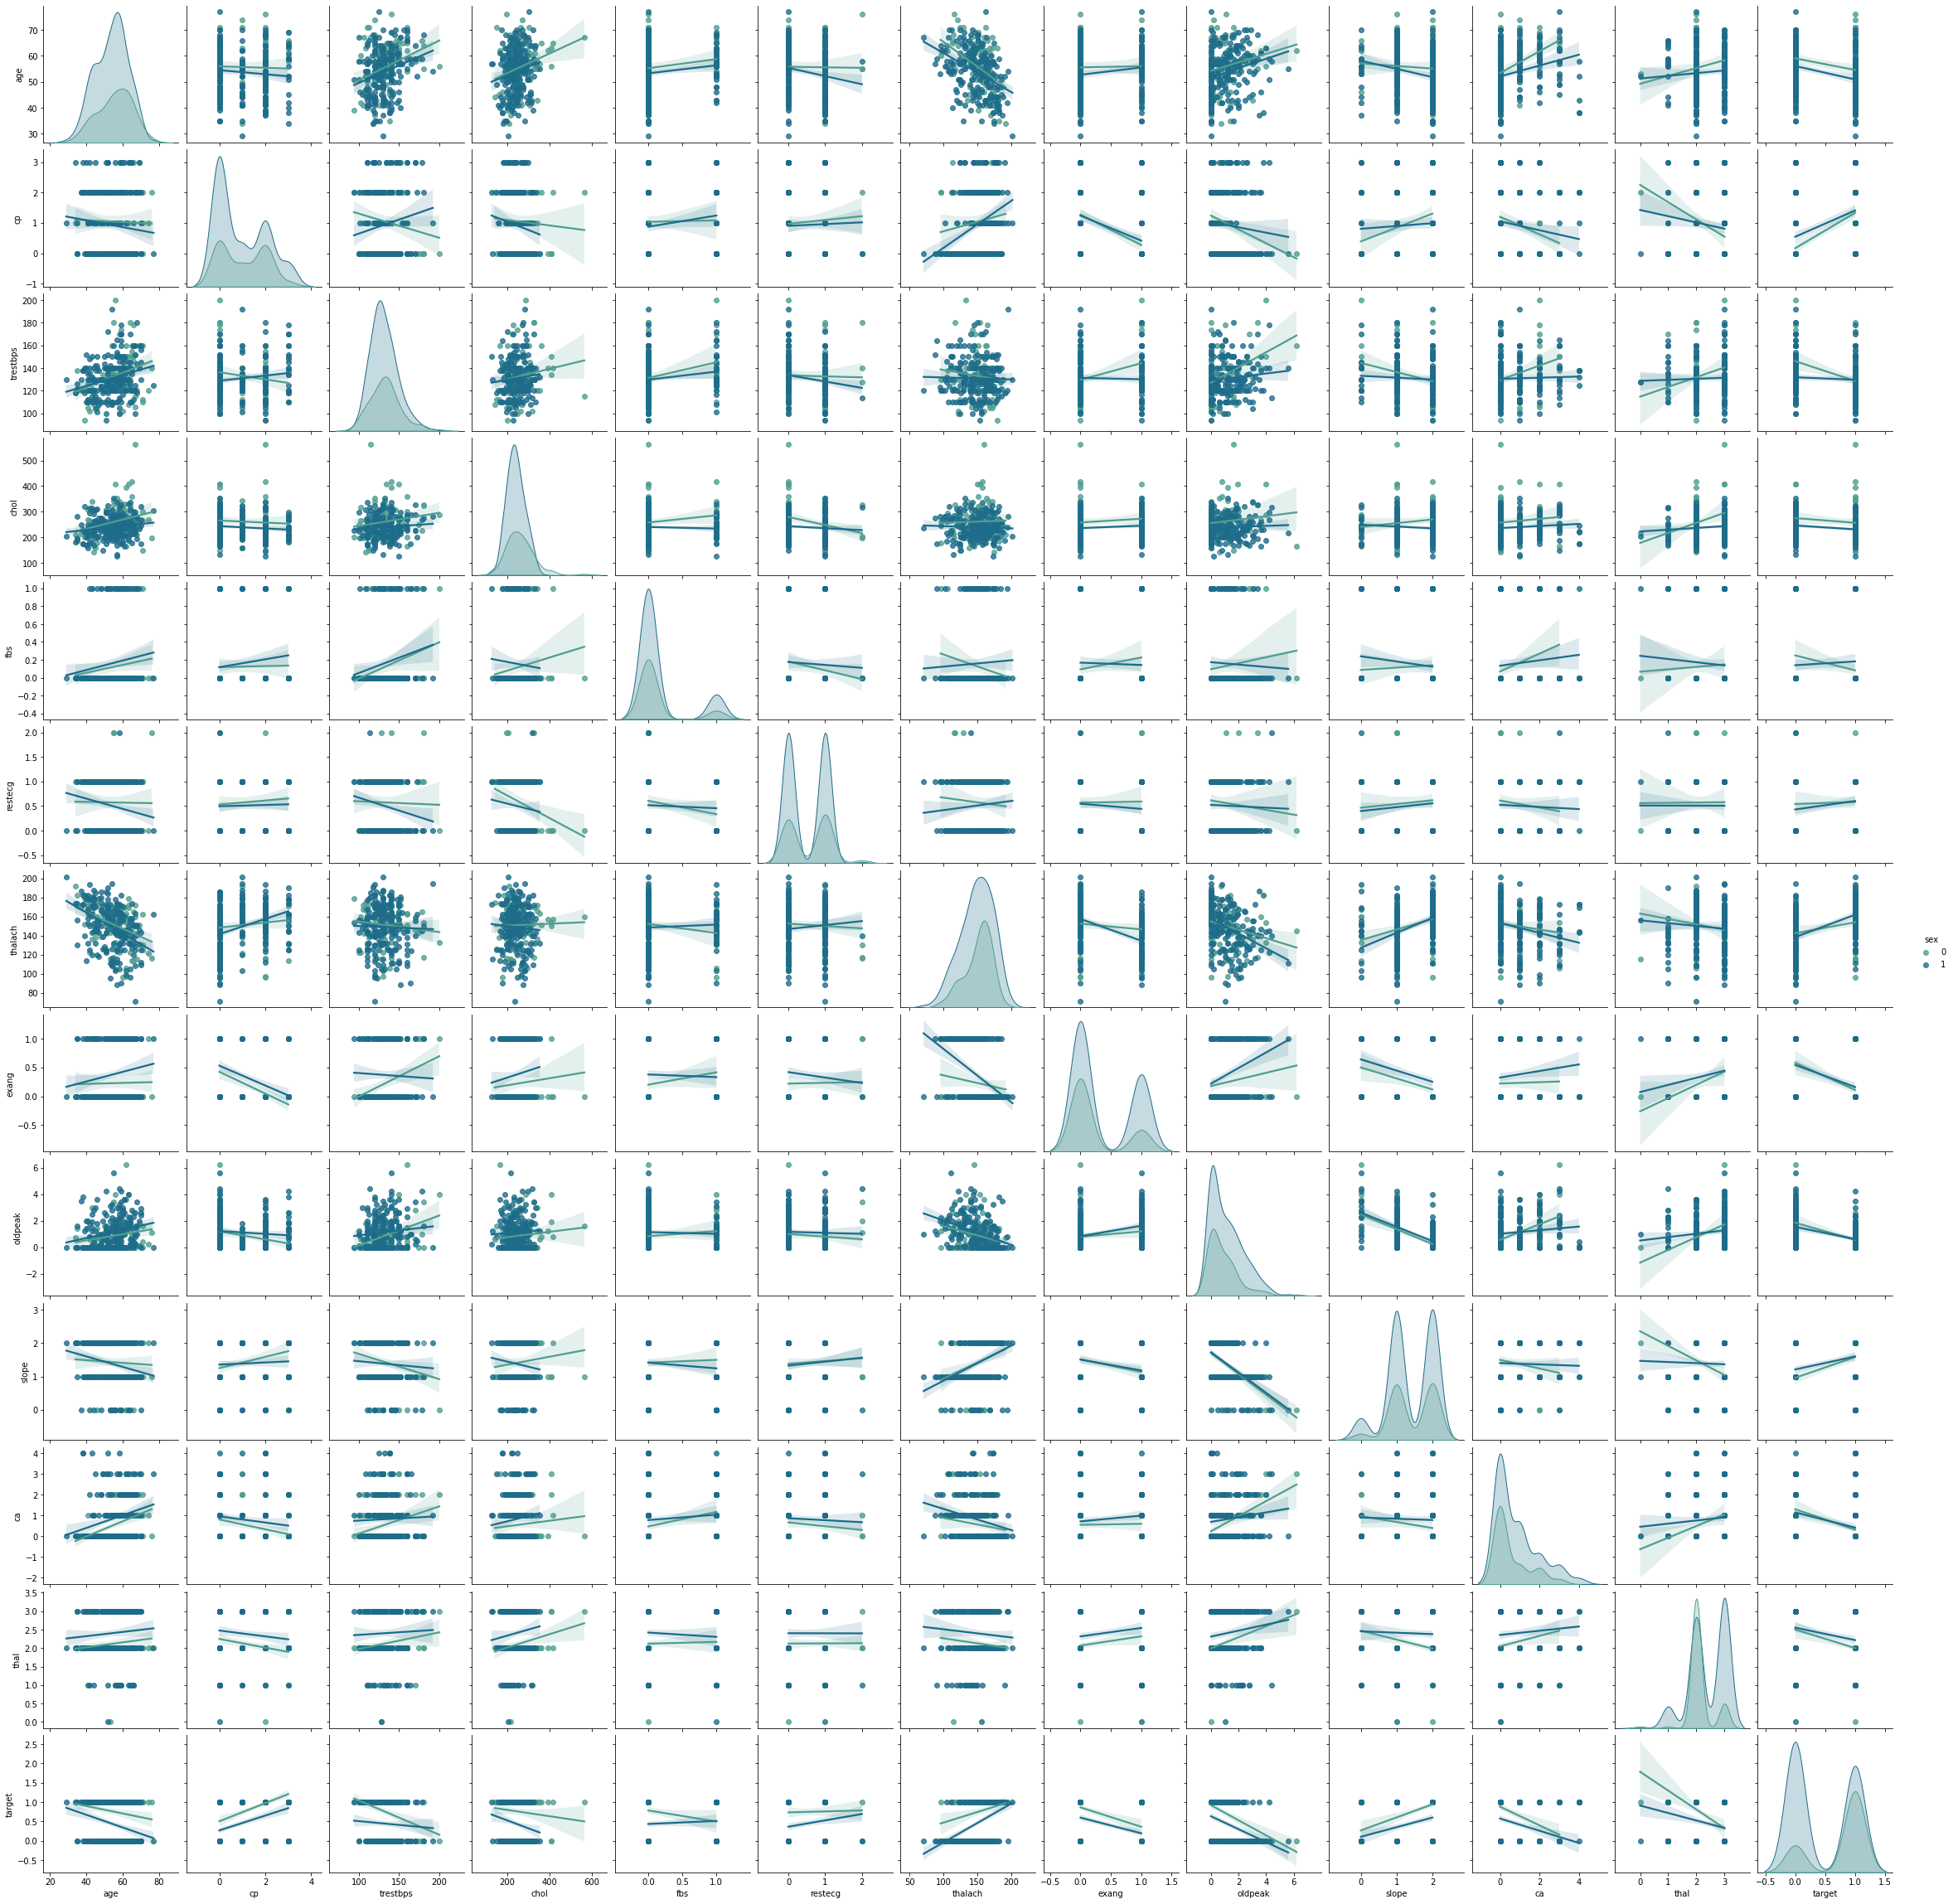

In [ ]:
sns.pairplot(dataset, hue='sex', kind="reg", dropna=False, palette="crest")

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


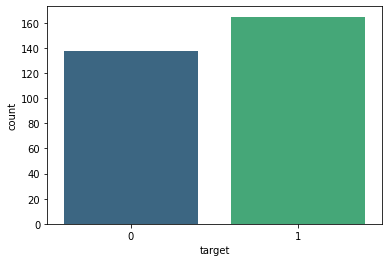

In [ ]:

sns.countplot(dataset["target"], palette='viridis')


contTarget = dataset.target.value_counts()

print(contTarget)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


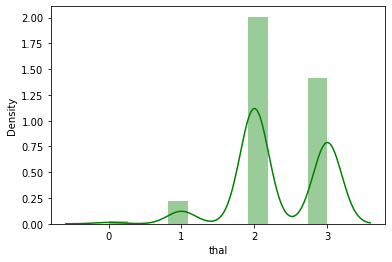

In [ ]:
sns.distplot(dataset["thal"], color='g')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


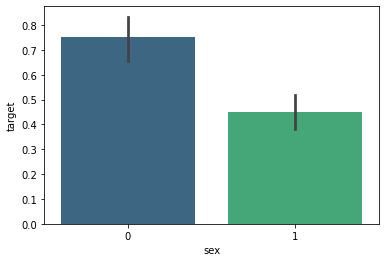

In [ ]:
sns.barplot(dataset["sex"],dataset["target"], palette='viridis')

In [ ]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
x = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,-1].values  

x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x ,y, test_size=0.2, random_state = 7)

In [ ]:
y_teste.shape

(61,)

In [ ]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_treinamento = sc.fit_transform(X_treinamento)
X_teste = sc.transform(X_teste) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_treinamento :\n", X_treinamento[:5])
print("-------------------------")
print("\nX_teste :\n", X_teste[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_treinamento :
 [[-0.7015999   0.70272837 -0.93254343 -0.45814209  0.48886104 -0.41119597
  -0.95544248  0.75177592 -0.71589105 -0.47822119 -0.61905151 -0.69823164
   1.12746904]
 [-0.59352404  0.70272837  0.97189125 -0.80461205 -1.78272829 -0.41119597
  -0.95544248 -1.02923018 -0.71589105 -0.21912523  0.99181372  2.16570154
  -0.52615222]
 [-0.05314474  0.70272837 -0.93254343 -0.57363208  0.70693362 -0.41119597
  -0.95544248 -1.4744817   1.39686059  1.85364242 -0.61905151  1.21105714
  -0.52615222]
 [ 1.24376558  0.70272837 -0.93254343  1.62067766 -0.34708383 -0.41119597
  -0.95544248 -0.49492835 -0.71589105  1.07635455  0.99181372 -0.69823164
  -2.17977348]
 [ 0.919538    0.70272837 -0.93254343 -0.11167214  0.12540675 -0.41119597
  -0.95544248 -0.09420198 -0.71589105  0.29906668 -0.61905151  0.25641275
   1.12746904]]
-------------------------

X_teste :
 [[-2.21466195 -1.42302495  0

# Predição com KNN 
 Baseline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30, p=1) #[1,10,30,50]
Maquina_Preditiva = Maquina_Preditiva.fit(X_treinamento,y_treinamento)

In [ ]:
y_pred = Maquina_Preditiva.predict(X_teste)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_teste)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 [1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1]

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 [1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1]


Avaliando resultados KNN


In [ ]:
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=1,
                     weights='uniform')>

In [ ]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_teste, y_pred)*100)

Acurácia da Máquina =  67.21311475409836


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_teste, y_pred)*100)
cm = confusion_matrix(y_teste,y_pred)
cr = classification_report(y_teste, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  67.21311475409836
[[15 15]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        30
           1       0.63      0.84      0.72        31

    accuracy                           0.67        61
   macro avg       0.69      0.67      0.66        61
weighted avg       0.69      0.67      0.66        61



Maquina Preditiva 2

In [ ]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classificador = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=1000,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)

In [ ]:
classificador.fit(X_treinamento,y_treinamento)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classificador.predict(X_teste)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_teste)
print("Acurácia da Máquina = ", metrics.accuracy_score(y_teste, y_pred)*100)


---------------------------

Predicted Values for Test Set :
 [1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1]

---------------------------

Actual Values for Test Set :
 [1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1]
Acurácia da Máquina =  72.1311475409836


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [ ]:
x = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,-1].values  

y.shape

(303,)

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x,
                                                                  y,
                                                                  test_size = 0.2,
                                                                  random_state = 0)
X_treinamento.shape

(242, 13)

In [ ]:
X_teste.shape

(61, 13)

In [ ]:



modelo = Sequential()
#primeira camada oculta, 32 neuronios, 13 neuronios de entrada
modelo.add(Dense(units = 512, input_dim = 13))
#segunda camada oculta
modelo.add(Dense(units = 512))
modelo.add(Dense(units = 512))
# Função softmax porque temos um problema de classificação com mais de duas classes 
#(é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 1, activation = 'softmax'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               7168      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 532,993
Trainable params: 532,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
modelo.fit(X_treinamento, y_treinamento, epochs = 100,
           validation_data = (X_teste, y_teste))

Epoch 1/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.0000e+00 - val_accuracy: 0.5574
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5413 - val_loss: 0.00

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

#367
#1818

for x in range(2000):
    floresta = RandomForestClassifier(random_state=x, n_estimators=10)
    floresta.fit(X_treinamento,y_treinamento)
    y_pred_floresta = floresta.predict(X_teste)
    acuracia = round(accuracy_score(y_pred_floresta,y_teste)*100,2)
    if(acuracia>max_acuracia):
        max_acuracia = acuracia
        melhorx = x
        
print(max_acuracia)
print(melhorx)



95.08
1818


In [ ]:
floresta = RandomForestClassifier(random_state=1818, n_estimators=10)
floresta.fit(X_treinamento,y_treinamento)
Y_pred_floresta = floresta.predict(X_teste)

print(Y_pred_floresta)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]


In [ ]:
previsoes = rf.predict(X_teste)
confusao = confusion_matrix(y_teste, Y_pred_rf)
taxa_acerto = round(accuracy_score(y_teste, Y_pred_rf)*100,2)
taxa_acerto
print("Acurácia: ",taxa_acerto)
print("---Matriz de Confusão----")
print(confusao)

Acurácia:  95.08
---Matriz de Confusão----
[[27  0]
 [ 3 31]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    arvore = DecisionTreeClassifier(random_state=x, splitter='random', min_samples_split=2, min_samples_leaf=4)
    arvore.fit(X_treinamento,y_treinamento)
    Y_pred_arvore = arvore.predict(X_teste)
    current_accuracy = round(accuracy_score(Y_pred_arvore,y_teste)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        melhorx = x
        
print(max_accuracy)
print(melhorx)


arvore = DecisionTreeClassifier(random_state=melhorx)
arvore.fit(X_treinamento,y_treinamento)
Y_pred_arvore = arvore.predict(X_teste)

90.16
28


In [ ]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB( )

naivebayes.fit(X_treinamento,y_treinamento)

Y_pred_naivebayes = naivebayes.predict(X_teste)

print(Y_pred_naivebayes)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [ ]:
acuraciaNB = round(accuracy_score(Y_pred_naivebayes,y_teste)*100,2)
print(acuraciaNB)


85.25


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_treinamento, y_treinamento)

Y_pred_xgb = xgb_model.predict(X_teste)

score_xgb = round(accuracy_score(Y_pred_xgb,y_teste)*100,2)

score_xgb

85.25

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_treinamento,y_treinamento,epochs=300)

Y_pred_nn = model.predict(X_teste)

Epoch 1/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8388
Epoch 2/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8512
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8512
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8471
Epoch 5/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8512
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8595
Epoch 7/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8388
Epoch 8/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8636
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8512
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8388
Epoch 11/300
8/8 [===========

In [ ]:


score_nn = round(accuracy_score(Y_pred_nn,y_teste)*100,2)

score_nn

81.97